In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/final_grape_data.zip

Archive:  /content/drive/MyDrive/final_grape_data.zip
   creating: final_grape_data/image/
  inflating: final_grape_data/image/1 (1).png  
  inflating: final_grape_data/image/1 (10).png  
  inflating: final_grape_data/image/1 (100).png  
  inflating: final_grape_data/image/1 (101).png  
  inflating: final_grape_data/image/1 (102).png  
  inflating: final_grape_data/image/1 (103).png  
  inflating: final_grape_data/image/1 (104).png  
  inflating: final_grape_data/image/1 (105).png  
  inflating: final_grape_data/image/1 (106).png  
  inflating: final_grape_data/image/1 (107).png  
  inflating: final_grape_data/image/1 (108).png  
  inflating: final_grape_data/image/1 (109).png  
  inflating: final_grape_data/image/1 (11).png  
  inflating: final_grape_data/image/1 (110).png  
  inflating: final_grape_data/image/1 (111).png  
  inflating: final_grape_data/image/1 (112).png  
  inflating: final_grape_data/image/1 (113).png  
  inflating: final_grape_data/image/1 (114).png  
  inflating: 

In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, LeakyReLU
from keras.layers import Input, UpSampling2D,BatchNormalization, ZeroPadding2D, Reshape, Permute
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [5]:
model = tf.keras.models.Sequential([
## defining encoder
    tf.keras.layers.Input(shape= (256, 256, 3)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), activation = 'relu',
    padding = 'valid'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu',
    padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    ## defining decoder path
    tf.keras.layers.UpSampling2D(size = (2,2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.UpSampling2D(size = (2,2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.UpSampling2D(size = (2,2)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.UpSampling2D(size = (2,2)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'),
])

In [6]:
def read_and_preprocess_images(folder_path, target_size=(128, 128), grayscale=False):
    images = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            if grayscale:
                image = cv2.imread(image_path, 0)
                image = np.expand_dims(image, axis=-1)
            else:
                image = cv2.imread(image_path)
            image = image.astype(np.float32) / 255.0
            image = cv2.resize(image, target_size)
            images.append(image)
    return np.array(images)

In [7]:
images = read_and_preprocess_images('/content/final_grape_data/image', target_size=(256, 256))
masks = read_and_preprocess_images('/content/final_grape_data/mask', target_size=(256, 256), grayscale=True)

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

images_train, images_test, masks_train, masks_test = train_test_split(images,masks,test_size=0.2,train_size=0.8,random_state=1)
images_train = np.array(images_train)
masks_train = np.array(masks_train)
images_test = np.array(images_test)
masks_test = np.array(masks_test)

masks_train = np.expand_dims(masks_train, axis=-1)
masks_test = np.expand_dims(masks_test, axis=-1)

In [10]:
from keras.optimizers import Adam

#model = Autoencoder()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(images_train, masks_train,
                    batch_size = 4,
                    epochs = 35,
                    validation_data = (images_test, masks_test),
                    verbose = 1)

Epoch 1/35
166/166 [==============================] - 23s 52ms/step - loss: 0.4423 - accuracy: 0.8460 - val_loss: 0.3219 - val_accuracy: 0.8485
Epoch 2/35
166/166 [==============================] - 5s 28ms/step - loss: 0.2926 - accuracy: 0.8509 - val_loss: 0.1934 - val_accuracy: 0.8485
Epoch 3/35
166/166 [==============================] - 5s 30ms/step - loss: 0.1137 - accuracy: 0.9377 - val_loss: 0.0732 - val_accuracy: 0.9529
Epoch 4/35
166/166 [==============================] - 5s 29ms/step - loss: 0.0695 - accuracy: 0.9541 - val_loss: 0.0641 - val_accuracy: 0.9566
Epoch 5/35
166/166 [==============================] - 5s 29ms/step - loss: 0.0631 - accuracy: 0.9563 - val_loss: 0.0568 - val_accuracy: 0.9585
Epoch 6/35
166/166 [==============================] - 5s 32ms/step - loss: 0.0582 - accuracy: 0.9581 - val_loss: 0.0535 - val_accuracy: 0.9597
Epoch 7/35
166/166 [==============================] - 5s 29ms/step - loss: 0.0546 - accuracy: 0.9593 - val_loss: 0.0599 - val_accuracy: 0.957

In [11]:
results = model.predict(images_test)
pred_mask = np.where(results > 0.5, 1, 0)

6/6 [==============================] - 5s 272ms/step


In [12]:
results[0].shape

(256, 256, 1)

In [13]:
loss, acc = model.evaluate(images_test, masks_test)
loss, acc

6/6 [==============================] - 0s 54ms/step - loss: 0.0305 - accuracy: 0.9668


(0.030484722927212715, 0.9668401479721069)

In [14]:
model.save('autoencoder.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


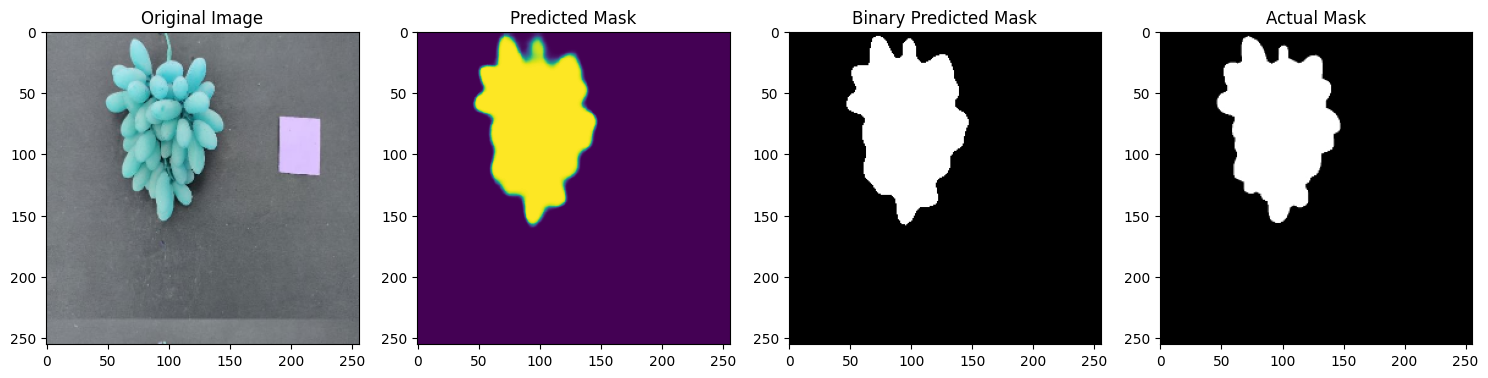

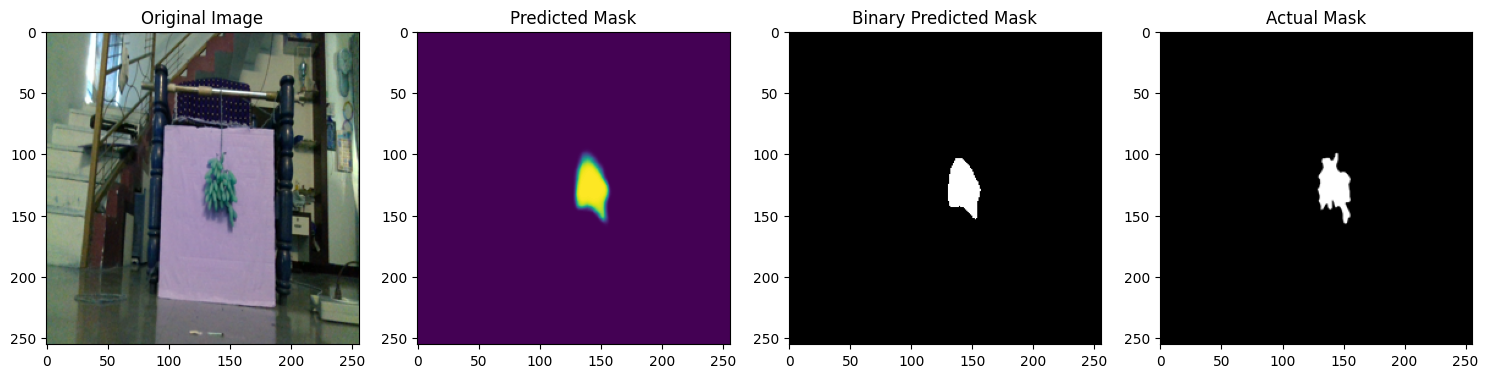

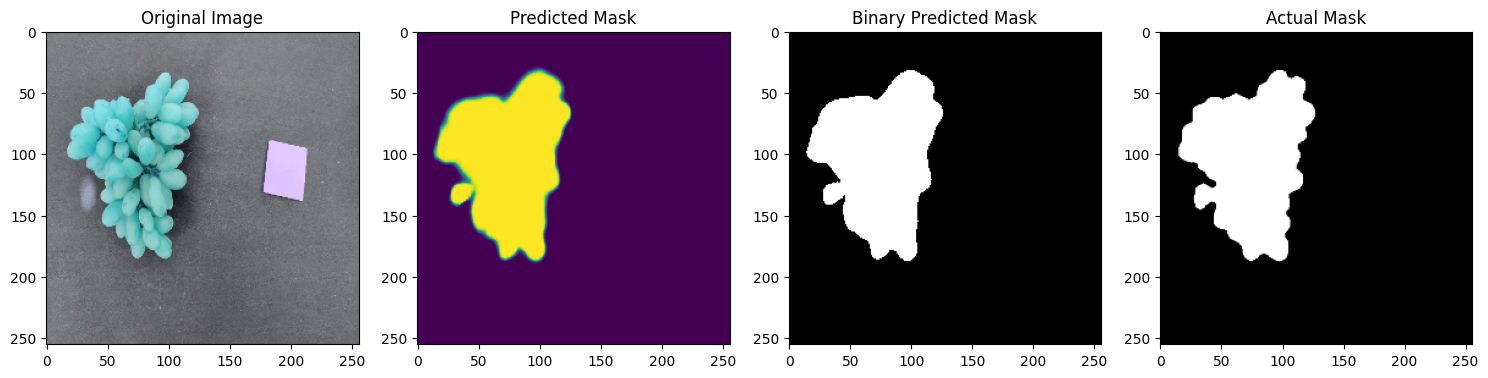

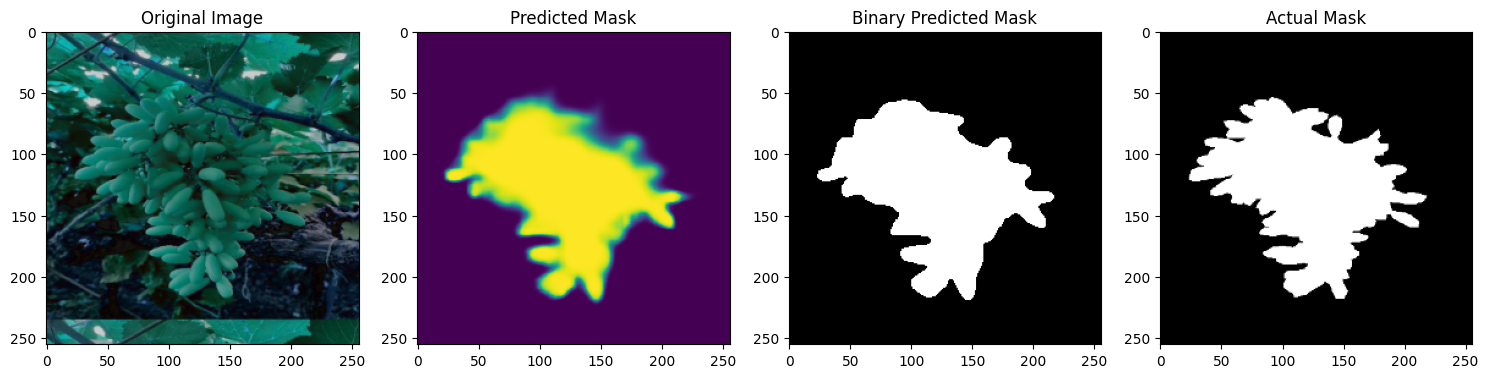

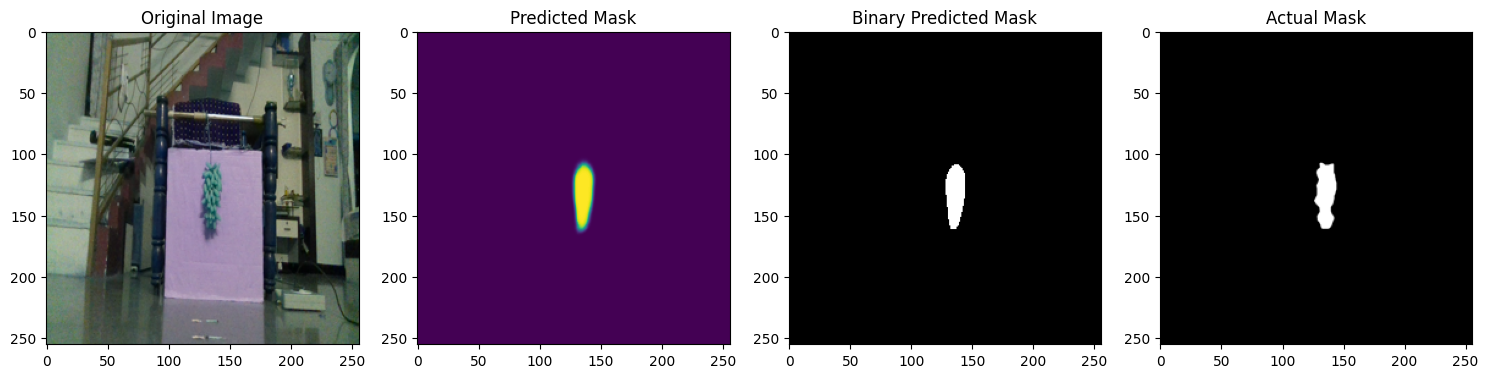

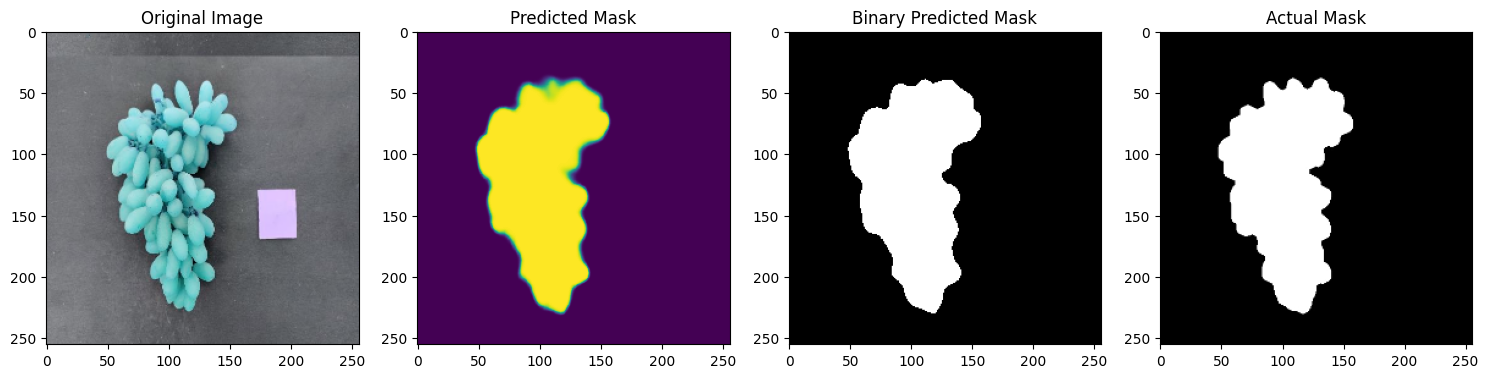

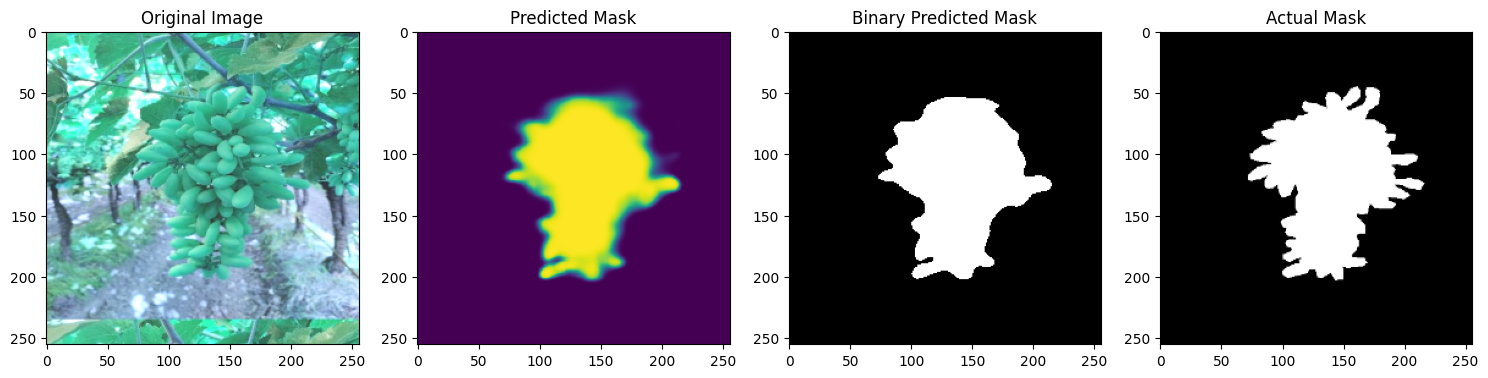

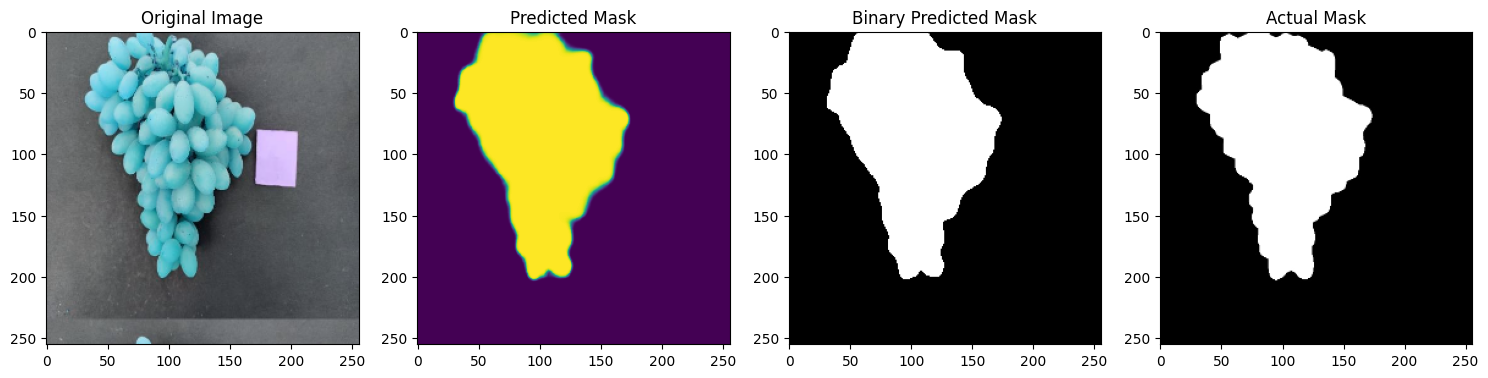

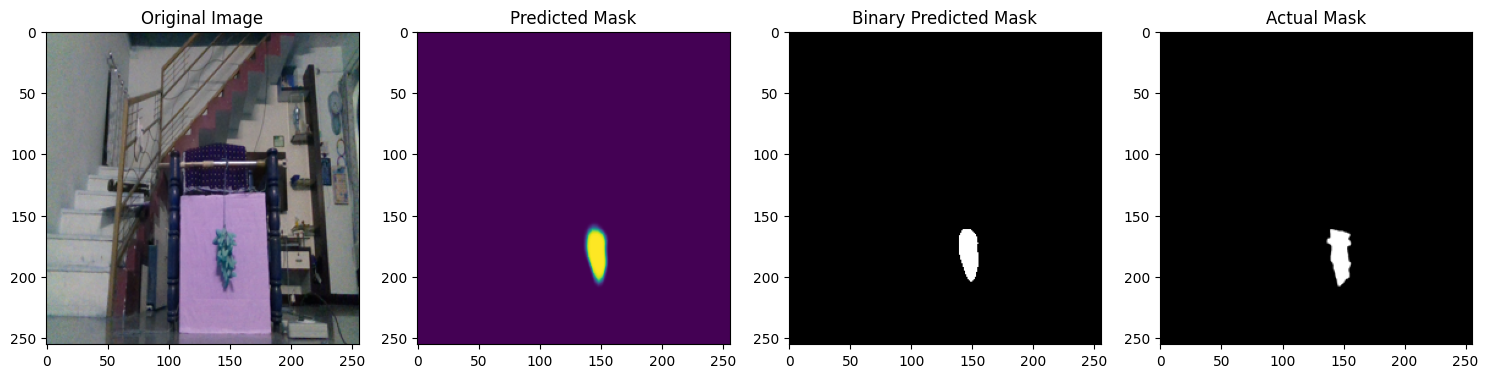

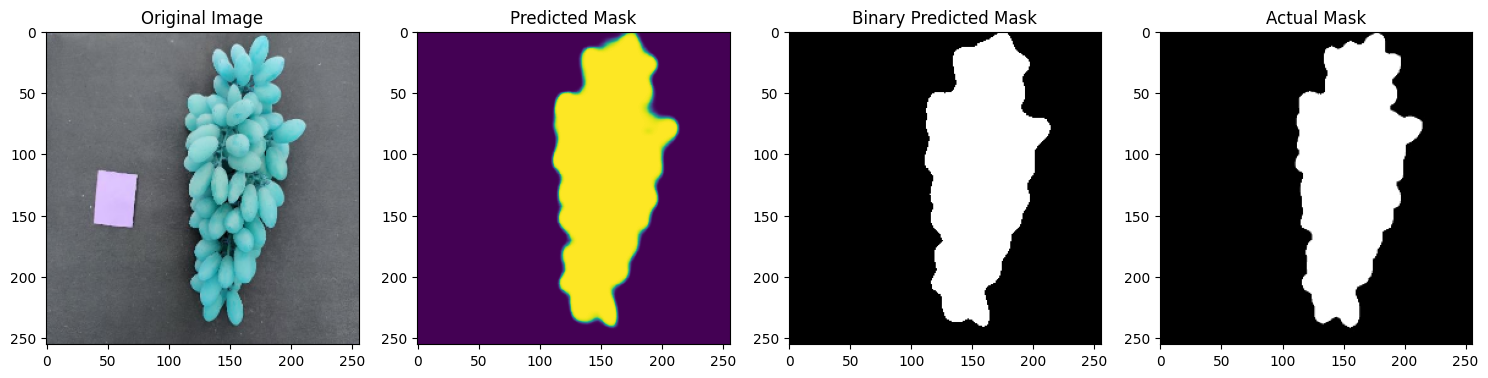

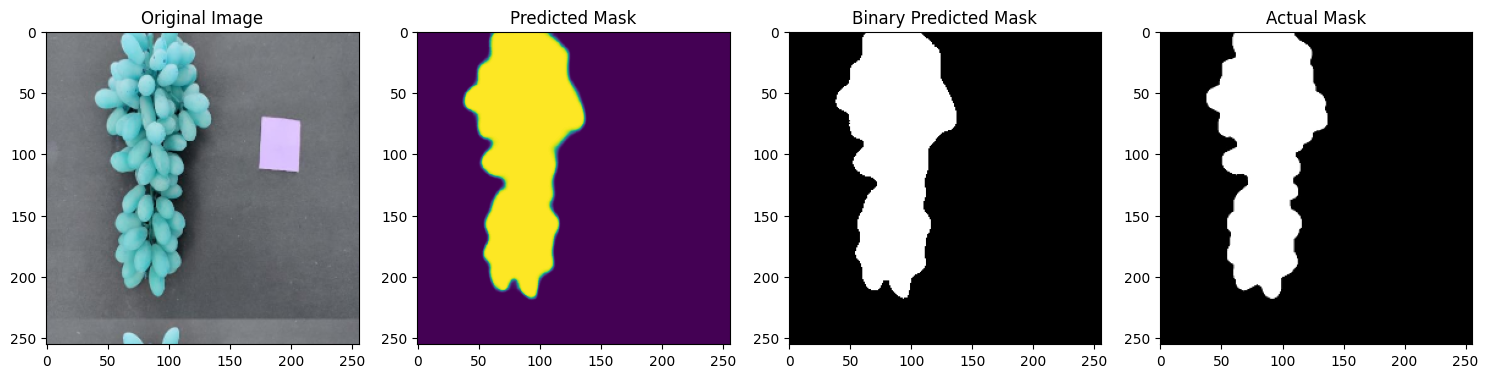

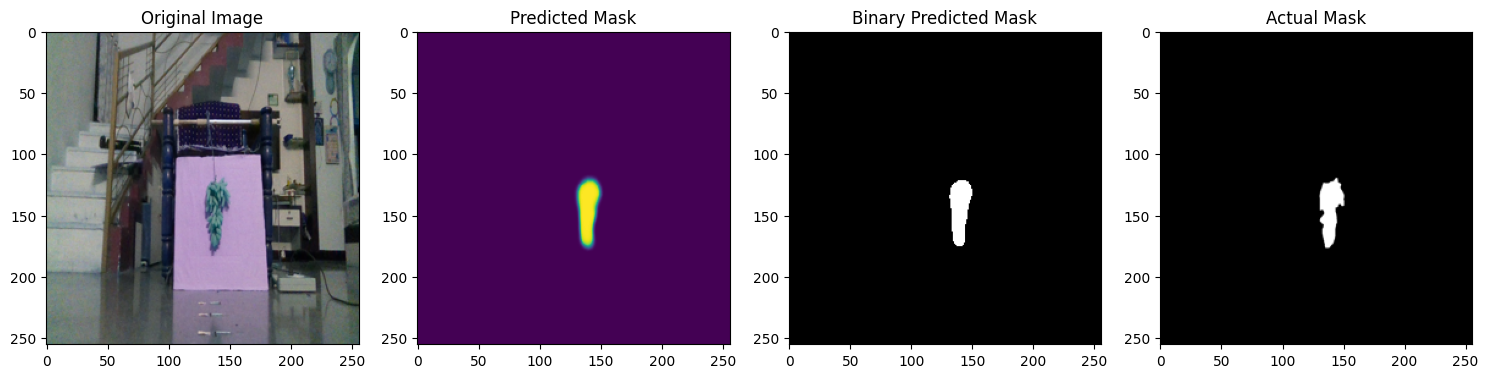

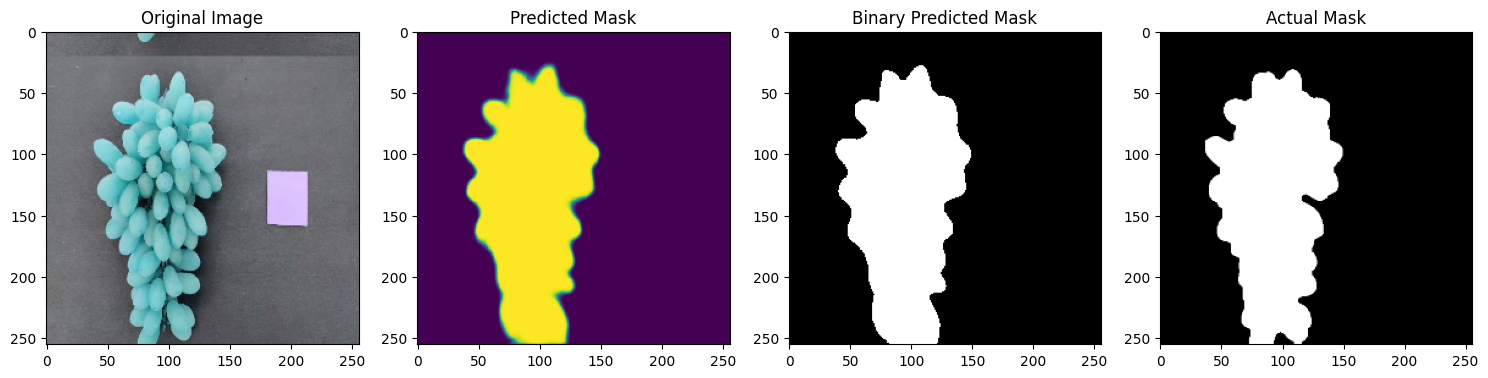

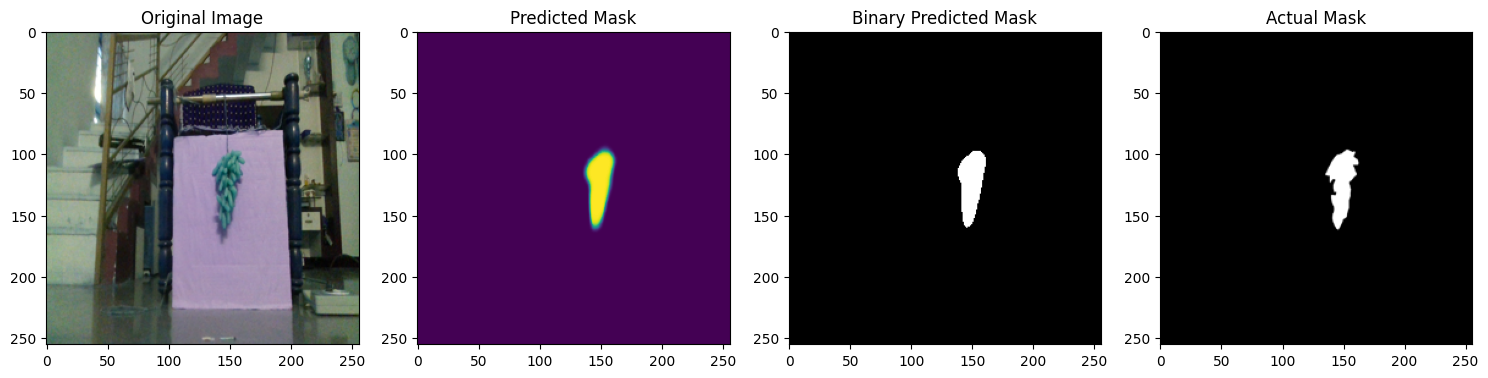

In [15]:
for i in range(20):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(images_test[i])
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(results[i])
    plt.title('Predicted Mask')

    plt.subplot(1, 4, 3)
    plt.imshow(pred_mask[i], cmap='gray')
    plt.title('Binary Predicted Mask')

    plt.subplot(1, 4, 4)
    plt.imshow(masks_test[i], cmap='gray')
    plt.title('Actual Mask')
    plt.tight_layout()
    plt.show()

In [16]:
def compute_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def compute_dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    dice_coefficient = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice_coefficient


iou = compute_iou(pred_mask, masks_test)
dice_coefficient = compute_dice_coefficient(pred_mask, masks_test)

print("IoU:", iou)
print("Dice Coefficient:", dice_coefficient)

IoU: 0.8794147698263041
Dice Coefficient: 0.9589214285265344


In [17]:
def compute_dice_loss(y_true, y_pred):
    dice_loss = 1 - compute_dice_coefficient(y_true, y_pred)
    return dice_loss

def compute_focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    epsilon = 1e-7
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    focal_loss = - (alpha * y_true * ((1 - y_pred) ** gamma) * np.log(y_pred) +
                    (1 - alpha) * (1 - y_true) * (y_pred ** gamma) * np.log(1 - y_pred))
    return focal_loss.mean()

dice_loss = compute_dice_loss(pred_mask, masks_test)
focal_loss = compute_focal_loss(pred_mask, masks_test)

print("Dice Loss:", dice_loss)
print("Focal Loss:", focal_loss)

Dice Loss: 0.04107857147346561
Focal Loss: 0.04890332627758411
